### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

-----
### Read train and test data

In [2]:
train=pd.read_csv('reg1_train.csv')
test=pd.read_csv('reg1_test.csv')

In [3]:
train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [5]:
train.dropna(inplace=True)

In [6]:
train.isna().sum()

x    0
y    0
dtype: int64

In [7]:
test.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


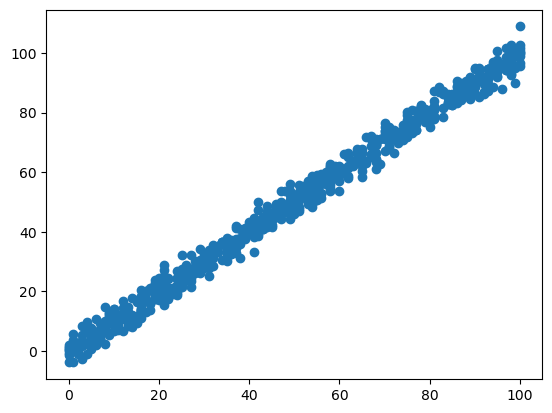

In [9]:
plt.scatter(data=train,x='x',y='y')
plt.show()

------
### Splitting The data

In [10]:
X_train=train.iloc[:,0].values.reshape(-1,1)
Y_train=train.iloc[:,-1].values.reshape(-1,1)
X_test=test.iloc[:,0].values.reshape(-1,1)
Y_test=test.iloc[:,-1].values.reshape(-1,1)

-----
### Build the model

In [11]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [12]:
model.coef_

array([[1.00065638]])

In [13]:
model.intercept_

array([-0.10726546])

In [14]:
Y_test[:4]

array([[79.77515201],
       [23.17727887],
       [25.60926156],
       [17.85738813]])

In [15]:
Y_pred=model.predict(X_test)
Y_pred[:4]

array([[76.94327594],
       [20.90651855],
       [21.90717494],
       [19.90586217]])

In [16]:
df=pd.DataFrame({'Actual':Y_test.flatten(),'Predicted':Y_pred.flatten()})
df

,Actual,Predicted
0,79.775152,76.943276
1,23.177279,20.906519
2,25.609262,21.907175
3,17.857388,19.905862
4,41.849864,35.916364
...,...,...
295,68.545888,70.939338
296,47.334876,45.922928
297,54.090637,54.928836
298,63.297171,61.933430


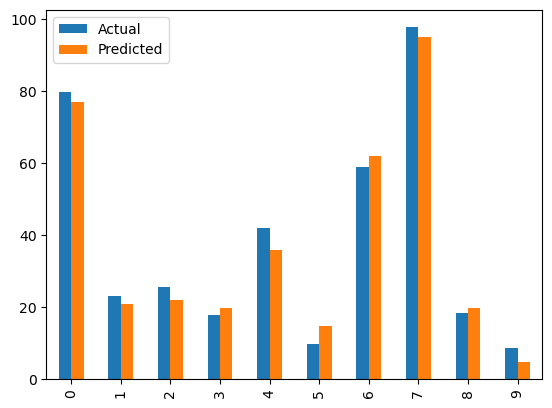

In [17]:
df.head(10).plot(kind='bar')
plt.show()

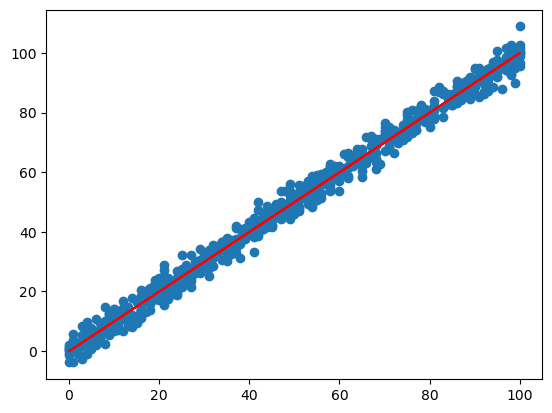

In [18]:
# for training data
plt.scatter(X_train,Y_train)
plt.plot(X_train,model.predict(X_train),color='red')
plt.show()

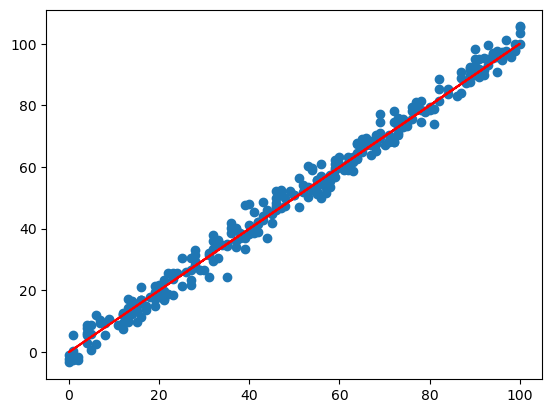

In [19]:
# for testing data
plt.scatter(X_test,Y_test)
plt.plot(X_train,model.predict(X_train),color='red')
plt.show()

---
### Calculating Accuracy

In [20]:
# Accuracy for training data
r2_score(Y_train,model.predict(X_train))

0.9907015319025518

In [21]:
# Accuracy for testing data
r2_score(Y_test,Y_pred)

0.9888014444327563

----
### Build the same model using statsmodel

In [22]:
X_stat=sm.add_constant(X_train)
model=sm.OLS(Y_train,X_stat).fit()

In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 7.426e+04
Date:                Thu, 10 Oct 2024   Prob (F-statistic):               0.00
Time:                        18:02:42   Log-Likelihood:                -1712.8
No. Observations:                 699   AIC:                             3430.
Df Residuals:                     697   BIC:                             3439.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1073      0.212     -0.506      0.613      -0.524       0.309
x1             1.0007      0.004    272.510      0.000       0.993       1.008
==============================================================================
Omnibus:                        0.170   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.919   Jarque-Bera (JB):                0.216
Skew:                           0.036   Prob(JB):                        0.898
Kurtosis:                       2.952   Cond. No.                         115.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""